In [163]:
import numpy as np
import pandas as pd
import math
import re
import seaborn as sns
import matplotlib as plt
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from sklearn.model_selection import GridSearchCV
import sklearn
lm = LinearRegression()
ridge = Ridge()
lasso = Lasso()
net   = ElasticNet()
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [164]:
#BASED ON V2 

In [165]:
train2 = pd.read_csv('./data/train_cleanV2.csv', index_col=0)

In [166]:
#Check for NA's
train2[train2.isna().any(axis=1)]

,LotFrontage,LotArea,Neighborhood,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,...,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_NoBsmt,BsmtExposure_NoExposure,TotalBath,Bedroom/Bathroom
Id,,,,,,,,,,,,,,,,,,,,,


In [167]:
#Split train into 
trainX2=train2.drop('SalePrice',axis=1)
trainY2=train2['SalePrice']

In [168]:
##Lasso with 20 alphas btw 0.001 and 100. Normalizatio = True, ALL features 
lasso_coefs = []
lasso_intercepts = []
lasso_R2  = []
alphaRange = np.linspace(1e-3,100,20)
for alpha in alphaRange:
    lasso.set_params(alpha=alpha,normalize=True)  
    lasso.fit(trainX2,trainY2)
    lasso_intercepts.append(lasso.intercept_)
    lasso_coefs.append(lasso.coef_)
    lasso_R2.append(lasso.score(trainX2,trainY2)) 

In [169]:
#dataframe for all alphas with all features 
df_lasso_coef=pd.DataFrame(lasso_coefs,index=alphaRange,columns=trainX2.columns)
df_lasso_intercept=pd.DataFrame(lasso_intercepts,index=alphaRange,columns=['Intercept'])
df_lasso_R2= pd.DataFrame(lasso_R2,index=alphaRange, columns=['R2'])
df_lasso = pd.concat([df_lasso_R2,df_lasso_intercept,df_lasso_coef], axis=1)

In [170]:
#LassoCV with 10 folds Lasso with 20 alphas btw 0.001 and 100. Normalizatio = True, ALL features 
from sklearn.linear_model import LassoCV
alpha = np.linspace(1e-3,100,20)
regressor = LassoCV(alphas=list(alpha),max_iter=10000,cv=10, normalize=True, random_state=42)
regressor.fit(trainX2, trainY2)
lasso_mse = np.mean(regressor.mse_path_, axis=0)
print("Alphas: %s" % alpha)
print("Lasso RMSE on Training set :", lasso_mse)
print("Best Alpha using built-in LassoCV: %f" % regressor.alpha_)
#21.053 is the best Alpha per LassoCV

Alphas: [1.00000000e-03 5.26410526e+00 1.05272105e+01 1.57903158e+01
 2.10534211e+01 2.63165263e+01 3.15796316e+01 3.68427368e+01
 4.21058421e+01 4.73689474e+01 5.26320526e+01 5.78951579e+01
 6.31582632e+01 6.84213684e+01 7.36844737e+01 7.89475789e+01
 8.42106842e+01 8.94737895e+01 9.47368947e+01 1.00000000e+02]
Lasso RMSE on Training set : [5.82268225e+08 8.04270727e+08 6.15999951e+08 1.62971187e+09
 1.60833173e+09 8.87629489e+08 9.30202035e+08 7.33286999e+08
 3.36715574e+09 7.09248161e+08]
Best Alpha using built-in LassoCV: 15.790316


In [171]:
# select features based on LassoCV best alpha of 15
a=df_lasso.iloc[4:5,2:]!=0
new_alpha15=list(a[a.columns[(a != 0).any()]].columns)
trainX_alpha15=trainX2[new_alpha15]
print(len(new_alpha15))

38


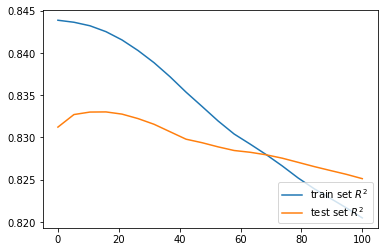

In [172]:
X_train, X_test, Y_train, Y_test = train_test_split(trainX_alpha15, trainY2, test_size=0.3, random_state=42)

lasso_R2_train  = []
lasso_R2_test = []
alphaRange = np.linspace(1e-3,100,20)
for alpha in alphaRange:
    #X_train, X_test, Y_train, Y_test = train_test_split(trainX_alpha15, trainY2, test_size=0.3)
    lasso.set_params(alpha=alpha,normalize=True)  
    lasso.fit(X_train,Y_train)
    lasso_R2_train.append(lasso.score(X_train,Y_train)) 
    lasso_R2_test.append(lasso.score(X_test,Y_test)) 
plt.plot(alphaRange, lasso_R2_train, label=r'train set $R^2$')
plt.plot(alphaRange, lasso_R2_test, label=r'test set $R^2$')
plt.legend(loc=4)

In [173]:
##set alpha to around 70, train/test score 
X_train, X_test, Y_train, Y_test = train_test_split(trainX_alpha15, trainY2, test_size=0.3, random_state=42)

lasso.set_params(alpha=70,normalize=True)  
lasso.fit(X_train,Y_train)
print("train R^2: %f" %lasso.score(X_train,Y_train))
print("test R^: %f"%lasso.score(X_test,Y_test))

train R^2: 0.827591
test R^: 0.827846


In [174]:
##set alpha to 15.79 per RidgeCV, train/test score 
X_train, X_test, Y_train, Y_test = train_test_split(trainX_alpha15, trainY2, test_size=0.3, random_state=42)

lasso.set_params(alpha=regressor.alpha_,normalize=True)  
lasso.fit(X_train,Y_train)
print("train R^2: %f" %lasso.score(X_train,Y_train))
print("test R^: %f"%lasso.score(X_test,Y_test))

train R^2: 0.842506
test R^: 0.833023


In [175]:
#cross validation for 38 features. 
from sklearn.model_selection import cross_validate
scores = cross_validate(lasso, trainX_alpha15, trainY2, cv=5,
                        scoring=('r2', 'neg_mean_squared_error'),
                        return_train_score=True)
print(scores['test_neg_mean_squared_error'])      
print(scores['train_r2'])  

[-6.38560812e+08 -1.09573130e+09 -1.16453813e+09 -7.71062945e+08
 -2.07710958e+09]
[0.83105621 0.84133924 0.83482514 0.83719345 0.87641033]


In [176]:
##Ridge with 20 alphas btw 0.001 and 100. Normalizatio = True 
ridge_coefs = []
ridge_intercepts = []
ridge_R2  = []
MSE = []
alphaRange = np.linspace(1e-3,100,20)
for alpha in alphaRange:
    ridge.set_params(alpha=alpha,normalize=True)  
    ridge.fit(trainX2,trainY2)
    ridge_intercepts.append(ridge.intercept_)
    ridge_coefs.append(ridge.coef_)
    ridge_R2.append(ridge.score(trainX2,trainY2))  

In [177]:
#dataframe for all alphas with all features 
df_ridge_coef=pd.DataFrame(ridge_coefs,index=alphaRange,columns=trainX2.columns)
df_ridge_intercept=pd.DataFrame(ridge_intercepts,index=alphaRange,columns=['Intercept'])
df_ridge_R2= pd.DataFrame(ridge_R2,index=alphaRange, columns=['R2'])
df_ridge = pd.concat([df_ridge_R2,df_ridge_intercept,df_ridge_coef], axis=1)

In [178]:
#Ridge with full features 
from sklearn.linear_model import RidgeCV
alpha = np.linspace(1e-3,100,20)
regressor = RidgeCV(alphas=list(alpha),store_cv_values=True,normalize=True)
regressor.fit(trainX2, trainY2)
cv_mse = np.mean(regressor.cv_values_, axis=0)

print("Alphas: %s" % alpha)
print("Ridge RMSE on Training set :", cv_mse)
print("Best Alpha using built-in RidgeCV: %f" % regressor.alpha_)
#this is the second alpha

Alphas: [1.00000000e-03 5.26410526e+00 1.05272105e+01 1.57903158e+01
 2.10534211e+01 2.63165263e+01 3.15796316e+01 3.68427368e+01
 4.21058421e+01 4.73689474e+01 5.26320526e+01 5.78951579e+01
 6.31582632e+01 6.84213684e+01 7.36844737e+01 7.89475789e+01
 8.42106842e+01 8.94737895e+01 9.47368947e+01 1.00000000e+02]
Ridge RMSE on Training set : [1.37439304e+09 1.97328366e+09 2.65045497e+09 3.16643743e+09
 3.56229287e+09 3.87255219e+09 4.12112913e+09 4.32425910e+09
 4.49312161e+09 4.63558730e+09 4.75732642e+09 4.86251369e+09
 4.95428416e+09 5.03503452e+09 5.10662649e+09 5.17052716e+09
 5.22790769e+09 5.27971395e+09 5.32671796e+09 5.36955595e+09]
Best Alpha using built-in RidgeCV: 0.001000


In [179]:
# select features based on RidgeCV best alpha of 0.001
a=df_lasso.iloc[0:2,2:]!=0
new_alpha1=list(a[a.columns[(a != 0).any()]].columns)
trainX_alpha1=trainX2[new_alpha15]
print(len(new_alpha1))

75


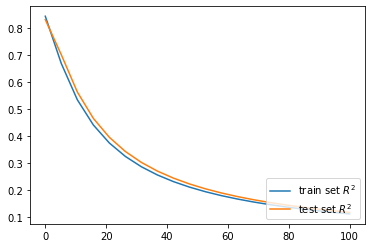

In [180]:

X_train, X_test, Y_train, Y_test = train_test_split(trainX_alpha15, trainY2, test_size=0.3, random_state=42)

ridge_R2_train  = []
ridge_R2_test = []
alphaRange = np.linspace(1e-3,100,20)
for alpha in alphaRange:
    #X_train, X_test, Y_train, Y_test = train_test_split(trainX_alpha15, trainY2, test_size=0.3)
    ridge.set_params(alpha=alpha,normalize=True)  
    ridge.fit(X_train,Y_train)
    ridge_R2_train.append(ridge.score(X_train,Y_train)) 
    ridge_R2_test.append(ridge.score(X_test,Y_test)) 
plt.plot(alphaRange, ridge_R2_train, label=r'train set $R^2$')
plt.plot(alphaRange, ridge_R2_test, label=r'test set $R^2$')
plt.legend(loc=4)

In [181]:
X_train, X_test, Y_train, Y_test = train_test_split(trainX_alpha15, trainY2, test_size=0.3, random_state=42)

ridge.set_params(alpha=0.001,normalize=True)  
ridge.fit(X_train,Y_train)
print("train R^2: %f" %ridge.score(X_train,Y_train))
print("test R^2: %f"%ridge.score(X_test,Y_test))

train R^2: 0.843855
test R^2: 0.831399


In [182]:
from sklearn.model_selection import cross_validate
scores = cross_validate(lasso, trainX_alpha1, trainY2, cv=5,
                        scoring=('r2', 'neg_mean_squared_error'),
                        return_train_score=True)
print(scores['test_neg_mean_squared_error'])      
print(scores['train_r2'])  

[-6.38560812e+08 -1.09573130e+09 -1.16453813e+09 -7.71062945e+08
 -2.07710958e+09]
[0.83105621 0.84133924 0.83482514 0.83719345 0.87641033]


In [192]:
X_train, X_test, Y_train, Y_test = train_test_split(trainX_alpha15, trainY2, test_size=0.3, random_state=42)
  
lm.fit(X_train,Y_train)
print("train R^2: %f" %lm.score(X_train,Y_train))
print("test R^2: %f"%lm.score(X_test,Y_test))

train R^2: 0.843856
test R^2: 0.831227


In [193]:
from sklearn.model_selection import cross_validate
scores = cross_validate(lm, trainX_alpha15, trainY2, cv=5,
                        scoring=('r2', 'neg_mean_squared_error'),
                        return_train_score=True)
print(scores['test_neg_mean_squared_error'])      
print(scores['train_r2'])  

[-6.41294787e+08 -1.09606411e+09 -1.11488081e+09 -7.43374837e+08
 -2.14645355e+09]
[0.83249382 0.84284809 0.83632674 0.83853601 0.87798595]


In [195]:
##further feature selection based on features not included from step wise 
#forward and back selection bsased on AIC value
feature_drop=['LotFrontage', 'BsmtCond', 'FireplaceQu', 'GarageArea', 'Exterior1st_Other','Exterior2nd_HdBoard', 
'MasVnrType_BrkFace','SaleCondition_Family', 'BsmtExposure_NoExposure']

In [183]:
# #filter out features with VIF>5
# exogs=list(trainX_alpha15.columns)
# data=trainX_alpha15
# VIF=sklearn_vif(exogs=exogs,data=data)
# feature_drop=list(VIF[VIF['VIF']>5].index)
# feature_drop

In [196]:
trainX_29=trainX_alpha15.drop(feature_drop,axis=1)

In [197]:
#LassoCV with 10 folds Lasso with 20 alphas btw 0.001 and 100 for 35 features 
from sklearn.linear_model import LassoCV
alpha = np.linspace(1e-3,100,20)
regressor = LassoCV(alphas=list(alpha),max_iter=10000,cv=10, normalize=True, random_state=42)
regressor.fit(trainX_29, trainY2)
lasso_mse = np.mean(regressor.mse_path_, axis=0)
print("Alphas: %s" % alpha)
print("Lasso RMSE on Training set :", lasso_mse)
print("Best Alpha using built-in LassoCV: %f" % regressor.alpha_)
#21.053 is the best Alpha per LassoCV

Alphas: [1.00000000e-03 5.26410526e+00 1.05272105e+01 1.57903158e+01
 2.10534211e+01 2.63165263e+01 3.15796316e+01 3.68427368e+01
 4.21058421e+01 4.73689474e+01 5.26320526e+01 5.78951579e+01
 6.31582632e+01 6.84213684e+01 7.36844737e+01 7.89475789e+01
 8.42106842e+01 8.94737895e+01 9.47368947e+01 1.00000000e+02]
Lasso RMSE on Training set : [5.78692274e+08 8.01036377e+08 6.14023747e+08 1.59465117e+09
 1.60875220e+09 8.95179961e+08 9.34869511e+08 7.42606904e+08
 3.17110270e+09 7.15761329e+08]
Best Alpha using built-in LassoCV: 0.001000


In [198]:
##set alpha to 5.264 per RidgeCV, train/test score 
X_train, X_test, Y_train, Y_test = train_test_split(trainX_29, trainY2, test_size=0.3, random_state=42)

lasso.set_params(alpha=regressor.alpha_,normalize=True)  
lasso.fit(X_train,Y_train)
print("train R^2: %f" %lasso.score(X_train,Y_train))
print("test R^2: %f"%lasso.score(X_test,Y_test))

train R^2: 0.840243
test R^2: 0.832024


In [199]:
#cross validation for 29 features. 
from sklearn.model_selection import cross_validate
scores = cross_validate(lasso, trainX_29, trainY2, cv=5,
                        scoring=('r2', 'neg_mean_squared_error'),
                        return_train_score=True)
print(scores['test_neg_mean_squared_error'])      
print(scores['train_r2'])  

[-6.28677198e+08 -1.06288426e+09 -1.13322086e+09 -7.78502856e+08
 -2.03457655e+09]
[0.82895438 0.83861211 0.83356658 0.83684017 0.87282277]


In [200]:
#based on MLR
X_train, X_test, Y_train, Y_test = train_test_split(trainX_29, trainY2, test_size=0.3, random_state=42)

lm.fit(X_train,Y_train)
print("train R^2: %f" %lm.score(X_train,Y_train))
print("test R^2: %f"%lm.score(X_test,Y_test))

train R^2: 0.840243
test R^2: 0.832024


In [201]:
#cross validation based on MLR
from sklearn.model_selection import cross_validate
scores = cross_validate(lm, trainX_29, trainY2, cv=5,
                        scoring=('r2', 'neg_mean_squared_error'),
                        return_train_score=True)
print(scores['test_neg_mean_squared_error'])      
print(scores['train_r2'])  

[-6.28677377e+08 -1.06288457e+09 -1.13321829e+09 -7.78502542e+08
 -2.03457995e+09]
[0.82895438 0.83861211 0.83356658 0.83684017 0.87282277]


In [114]:

features = ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt','MasVnrArea', 'ExterQual', 'BsmtFinType1', 
'TotalBsmtSF','BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd','Functional', 'Fireplaces', 
'GarageYrBlt', 'WoodDeckSF', 'ScreenPorch','LotConfig', 'Exterior1st', 'MasVnrType',
'SaleCondition', 'SaleCondition', 'BsmtExposure','BsmtFullBath','BsmtHalfBath','FullBath',
           'HalfBath']

In [115]:
test = pd.read_csv('data/test.csv', index_col=0)

In [125]:
test.drop(list(set(test.columns)-set(features)),axis=1)

,LotFrontage,LotArea,LotConfig,OverallQual,OverallCond,YearBuilt,Exterior1st,MasVnrType,MasVnrArea,ExterQual,...,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageYrBlt,WoodDeckSF,ScreenPorch,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,80.0,11622,Inside,5,6,1961,VinylSd,None,0.0,TA,...,2,1,TA,5,Typ,0,1961.0,140,120,Normal
1462,81.0,14267,Corner,6,6,1958,Wd Sdng,BrkFace,108.0,TA,...,3,1,Gd,6,Typ,0,1958.0,393,0,Normal
1463,74.0,13830,Inside,5,5,1997,VinylSd,None,0.0,TA,...,3,1,TA,6,Typ,1,1997.0,212,0,Normal
1464,78.0,9978,Inside,6,6,1998,VinylSd,BrkFace,20.0,TA,...,3,1,Gd,7,Typ,1,1998.0,360,0,Normal
1465,43.0,5005,Inside,8,5,1992,HdBoard,None,0.0,Gd,...,2,1,Gd,5,Typ,0,1992.0,0,144,Normal
1466,75.0,10000,Corner,6,5,1993,HdBoard,None,0.0,TA,...,3,1,TA,7,Typ,1,1993.0,157,0,Normal
1467,NaN,7980,Inside,6,7,1992,HdBoard,None,0.0,TA,...,3,1,TA,6,Typ,0,1992.0,483,0,Normal
1468,63.0,8402,Inside,6,5,1998,VinylSd,None,0.0,TA,...,3,1,TA,7,Typ,1,1998.0,0,0,Normal
1469,85.0,10176,Inside,7,5,1990,HdBoard,None,0.0,TA,...,2,1,Gd,5,Typ,1,1990.0,192,0,Normal


In [ ]:
test['TotalBath']=test['BsmtFullBath']+train['BsmtHalfBath']/2+train['FullBath']+train['HalfBath']/2

In [107]:
import statsmodels.api as sm
x = sm.add_constant(trainX_26)
model = sm.OLS(trainY2, x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     238.8
Date:                Wed, 13 Nov 2019   Prob (F-statistic):               0.00
Time:                        15:24:26   Log-Likelihood:                -17221.
No. Observations:                1452   AIC:                         3.450e+04
Df Residuals:                    1425   BIC:                         3.464e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -3


continuous and ordinal 
- some features dropped to zero with relatively small penalization
1. LotFrontage 
2. YearReModAdd - interesting it dropped to zero then back 
3. ExterCond - could be correlated to ExterQual 
4. BsmtCond - could be correlated to BsmtQual 
5. BsmtFinSF2 - could be correleated to Bsmt features
6. BsmtUnfSF - could be correlated to other Bsmt features 
7. BedrooAbvG - zero after 7 alphas 
8. GarageYrBlt - could be correlated to YrHouseBuilt 
9. GarageQual - could be correlated to OverallQual or other Garage features 
10. GarageCond - could be correlated to GarageQual or OverallQual
11. PavedDrive - could be related to OverallQual 
12. OpenPorchSF - maybe we should remove 
13. EnclosedPorchSF - maybe we should remove 
14. 3SsnPorch - zero at 6th alpha
15. PoolArea - maybe w should remove 
16. PoolQC - 
18. Fence
19. MoSold - 
20. YrSold - 
21. Gar2  (misc feature) - maybe we should remove
22. Shed (misc feature) - maybe we should remove 
23. TenC (misc feature tennis court) - maybe we should remoe 

- coefs decreased  to zero then above zero 
1. TotalBsmtSF
2. 1stFlrSf
3. ExterQual
4. TotalBsmtSF 



- coefs that increased then decreased 
1. BsmtFinType1

- coefs with increasing coefs 
1. OverallQual
2. ExterQual 
3. KitchenQual 
4.  GarageCars

- features that seem to be important
1. LotArea
2. OverallQual
3. OverallCond
4. YearBuilt
5. YearRemodAdd
6. MasVnrArea
7. ExterQual
8. BsmtQual
9. BsmtFinType1
10. BsmtFinTypeSF - maybe we should add together the SF?
11. HeatingQC
12. GrLivArea
13. KitchenAbvGr
14. KitchenQual
15. GarageFinish
16. GarageCars
17. WooddeckSF
18. TotalBaths



#CATEGORICAL 
1. MS_Zoning - seems like RM (residential medium density has the most weight on coefs)

2. Alley ( no vs paved)
3. LotShape
   - reg goes to zero quickly
4. LotConfig 
   -FR2, FR3, Inside go down to zero quickly 
5. Landslope - call go down to zero quickly 
6. Neighborhood 
  - BrDale, ClearCr, CollgCr, Gilbert, IDOTRR, MeadowV, NAmes, NPkVills, SWISU, Sawyer, Timber go down quickly 
7. condition 
  -PoSA, RRan, RRNe, RRNn go down quickly 
8. Bldgtype 
   - 2fmCon goes down to zero quicly 
9. HouseStyle
   0 2.5Unf, SFoyer, Slvl go down quickly 
10. RoofStyle
   - Gambrel,Mansard,Shed
   - Hip goes than to zero than back up 
11. RoofMatl  
   - Metal,Roll,Tar&Grv,WdShake go down quickly 
    - WdShngl seem to matter E
12. Exterior 1
    -only CemntBd,HdBoard, ImStuc, and Wd Sdng did NOT go down to zero quickly 
13. Exterior 2 
    - only _ImStucc, Stucco,Wd Shng did NOT go down to zero quickly 
     - VinylSd went to zero then back up 
14. MasVnrType
   - Seems like BrkFace is the only that did not go down to zero quicly 
15. Foundation - does not like seem any of the dummified features are important 
16. BsmtExposure
    -  only Gd and NoExposure seem to matter 
17. BsmtFinType2 - does not seem to matter 
18. Heating - only OthW seems to matter 
19. Electrical - does not seem to matter 
20. Central Air - does not seem to matter 
21. GarageType 
    -Builin went down to zero than back up 
22. SaleType 
   - only New Type seems to matter 
23. Sale Condition
    - only Family seem to matter 

In [92]:
import statsmodels.api as sm
x = sm.add_constant(trainX_35)
model = sm.OLS(trainY2, x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     180.5
Date:                Wed, 13 Nov 2019   Prob (F-statistic):               0.00
Time:                        15:07:04   Log-Likelihood:                -17207.
No. Observations:                1452   AIC:                         3.449e+04
Df Residuals:                    1416   BIC:                         3.468e+04
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -2

In [66]:
import pandas as pd
from sklearn.linear_model import LinearRegression

def sklearn_vif(exogs, data):

    # initialize dictionaries
    vif_dict, tolerance_dict = {}, {}

    # form input data for each exogenous variable
    for exog in exogs:
        not_exog = [i for i in exogs if i != exog]
        X, y = data[not_exog], data[exog]

        # extract r-squared from the fit
        r_squared = LinearRegression().fit(X, y).score(X, y)

        # calculate VIF
        vif = 1/(1 - r_squared)
        vif_dict[exog] = vif

        # calculate tolerance
        tolerance = 1 - r_squared
        tolerance_dict[exog] = tolerance

    # return VIF DataFrame
    df_vif = pd.DataFrame({'VIF': vif_dict, 'Tolerance': tolerance_dict})

    return df_vif